In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("netflix.csv")

In [4]:
df.shape

(8807, 12)

In [5]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [6]:
df.shape

(8807, 12)

In [7]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<div align="center">
    <b>Types of Content</b>
</div>

In [11]:
count = df["type"].value_counts()

In [12]:
count

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [13]:
counts_df = count.reset_index()
counts_df.columns = ['Type', 'Count']  

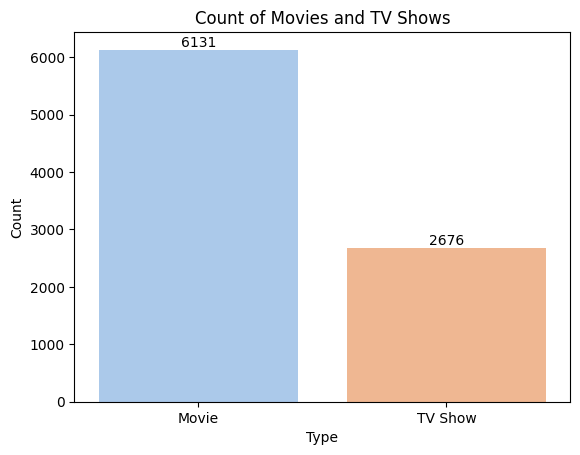

In [14]:
sns.barplot(x='Type', y='Count', data=counts_df, palette='pastel', hue='Type', dodge=False, legend=False)
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
for index, row in counts_df.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom')

plt.show()

<div align="center">
    <b>The most common rating for movies and tv shows</b>
</div>

In [16]:
most_common_rating = df.groupby('type')['rating'].agg(lambda x: x.mode()[0]).reset_index()


In [17]:
most_common_rating

,type,rating
0,Movie,TV-MA
1,TV Show,TV-MA


<div align="center">
    <b>Content Distribution by Country</b>
</div>

In [19]:
df_cleaned = df.dropna(subset=['country']).copy()  # Remove rows where country is Null or missing values
df_cleaned['country'] = df_cleaned['country'].str.split(',')
df_exploded = df_cleaned.explode('country')
country_counts = df_exploded['country'].value_counts()
    

In [20]:
top_5_countries = country_counts.head(5)

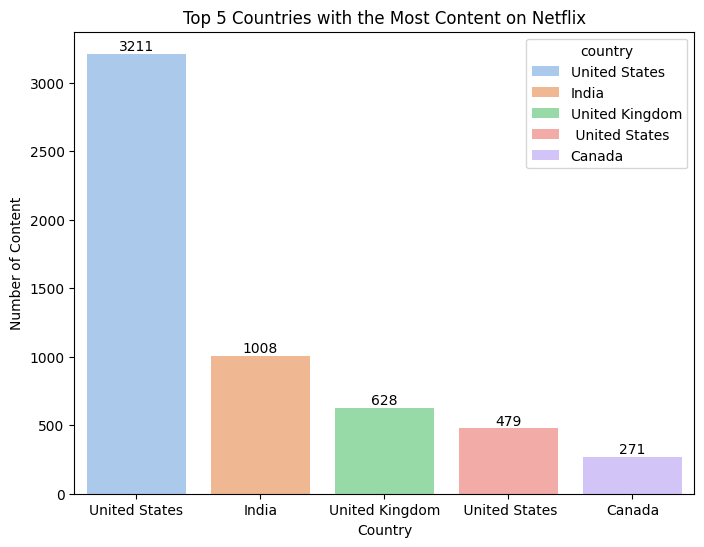

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='pastel',hue=top_5_countries.index,legend=True)
plt.xlabel('Country')
plt.ylabel('Number of Content')
plt.title('Top 5 Countries with the Most Content on Netflix')
for index, value in enumerate(top_5_countries.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

<div align ='center'>
    <b>Trends in TV Shows</b>
</div>

In [89]:
df_cleaned['duration_num'] = df_cleaned['duration'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) and 'Seasons' in x else 0)
long_running_shows = df_cleaned[(df_cleaned['type'] == 'TV Show') & (df_cleaned['duration_num'] >= 5)][['title', 'duration', 'director']]
long_running_shows.count

<bound method DataFrame.count of                               title   duration         director
8     The Great British Baking Show  9 Seasons  Andy Devonshire
21           Resurrection: Ertugrul  5 Seasons              NaN
55                        Nailed It  6 Seasons              NaN
65                     Numberblocks  6 Seasons              NaN
67                Saved by the Bell  9 Seasons              NaN
...                             ...        ...              ...
8422             The Mind of a Chef  5 Seasons              NaN
8442              The Office (U.S.)  9 Seasons              NaN
8557                  The West Wing  7 Seasons              NaN
8710                          Weeds  8 Seasons              NaN
8726           When Calls the Heart  5 Seasons              NaN

[160 rows x 3 columns]>

<div align = 'center'>
   <b> Popular Genre</b>
</div>
    

In [71]:
df_clean = df.dropna(subset=['listed_in']).copy()  # Remove rows where listed_in is Null or missing values
df_clean['listed_in'] = df_clean['listed_in'].str.split(',')
df_explode = df_clean.explode('listed_in')
genre_counts = df_explode['listed_in'].value_counts()

In [72]:
top_5_genre = genre_counts.head(5)

In [73]:
top_5_genre_df = top_5_genre.reset_index()
top_5_genre_df.columns = ['Genre', 'Count']
top_5_genre_df 

,Genre,Count
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829


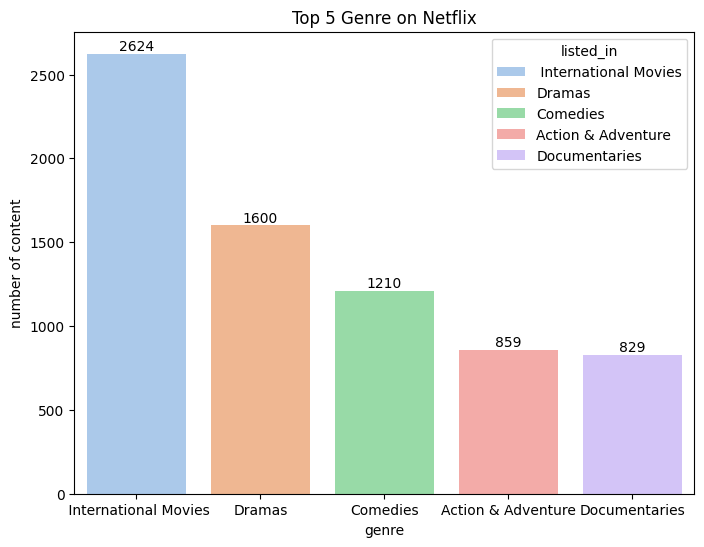

In [74]:
plt.figure(figsize = (8,6))
sns.barplot(x= top_5_genre.index, y = top_5_genre.values, palette = 'pastel', hue= top_5_genre.index, legend = True)
plt.xlabel('genre')
plt.ylabel('number of content')
plt.title('Top 5 Genre on Netflix')
for index, value in enumerate(top_5_genre.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()



<div align = 'center'>
    <b>The top 10 cast in India</b>
</div>

In [ ]:
df_clean = df.dropna(subset=['country', 'cast']).copy()
df_clean['country_clean'] = df_clean['country'].apply(lambda x: [country.strip() for country in str(x).split(',')])
df_clean = df_clean.explode('country_clean')

In [81]:
india_data = df_clean[df_clean['country_clean'] == 'India'].copy()
india_data['cast_clean'] = india_data['cast'].apply(lambda x: [actor.strip() for actor in str(x).split(',')])
india_data = india_data.explode('cast_clean')
top_cast = india_data['cast_clean'].value_counts().head(10)
top_cast_df = top_cast.reset_index()
top_cast_df.columns = ['Actor', 'Count']

In [82]:
top_cast_df

,Actor,Count
0,Anupam Kher,40
1,Shah Rukh Khan,34
2,Naseeruddin Shah,31
3,Om Puri,29
4,Akshay Kumar,29
5,Amitabh Bachchan,28
6,Paresh Rawal,28
7,Boman Irani,27
8,Kareena Kapoor,25
9,Ajay Devgn,21


In [141]:
df_clean = df.dropna(subset=['director']).copy()
df_clean['director'] = df_clean['director'].apply(lambda x: [country.strip() for country in str(x).split(',')])
df_clean = df_clean.explode('director')
top_directors = df_clean['director'].dropna().value_counts().reset_index()
top_directors.columns = ['Director', 'Content Count']
display(top_directors.head(5))


,Director,Content Count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Suhas Kadav,16


<div align = 'center'>
    <b> Release Patterns</b>
</div>

In [90]:
release_year_counts = df_clean['release_year'].value_counts().sort_index()

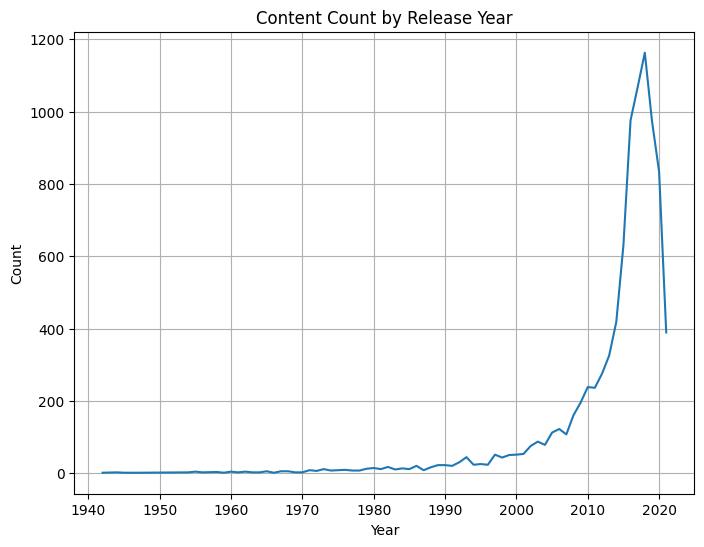

In [92]:
release_year_counts.plot(kind='line', figsize=(8, 6))
plt.title('Content Count by Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()


In [94]:
movies = df_clean[df_clean['type'] == 'Movie']
tv_shows = df_clean[df_clean['type'] == 'TV Show']

In [95]:
movies_by_year = movies['release_year'].value_counts().sort_index()
tv_shows_by_year = tv_shows['release_year'].value_counts().sort_index()

In [96]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

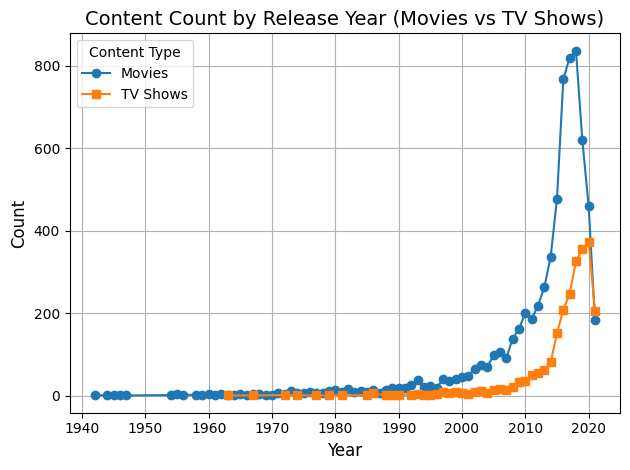

In [99]:
plt.plot(movies_by_year.index, movies_by_year.values, label='Movies', marker='o')
plt.plot(tv_shows_by_year.index, tv_shows_by_year.values, label='TV Shows', marker='s')
plt.title('Content Count by Release Year (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Content Type')
plt.grid()
plt.tight_layout()